<blockquote> <h3> Project Title </h3> </blockquote>
<h1 style = 'color:#0C73D1;' >  Exploratory Data Analysis Using SQL </h1>

### Summary:
In this portfolio project, I conducted an analysis of Flipkart sales data using SQL queries and visualized the results using matplotlib and seaborn. The analysis focused on exploring the distribution of products across main and sub-categories, identifying the most expensive and best-selling products, and examining the product rating and pricing trends. The data included information such as the product's title, category, rating, selling price, maximum retail price, seller name and rating, description, and highlights. By visualizing the data, I was able to gain insights into the sales patterns and product trends on Flipkart.  The project showcases the power of SQL for data analysis and the importance of data visualization for communicating insights effectively.

****

<p style="text-align:right"><b> Project By : Tejas Mahajan </b> <br> <b> Time Period : 21st March, 2023 To 23rd March, 2023 </b> </p>

In [1]:
# I am using mysql connector for connecting mysql database with jupyter notebook using python
import mysql.connector

# connection object for connecting with mysql database
conn = mysql.connector.connect(
  host="localhost",
  user="root",
  password="sql1432"
)

print(conn)

# Creating cursor object for executing sql queries
cur = conn.cursor()

In [2]:
# Importing pandas library for displaying data as dataframe or tabular format
import pandas as pd

I am only using __pandas__ to display the data in tabular format, as the SQL connector retrieves data in list and tuples objects, and I will not be using pandas for any kind of __exploratory data analysis__ and __transformation__ , because I want the analysis to be specific __SQL__ only.

In [3]:
# Importing visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.style.use('ggplot')
print('Done')

%matplotlib inline

# Reset the mpl parameter to default
# plt.rcParams.update(mpl.rcParamsDefault)

# Set the margins
mpl.rcParams['axes.xmargin'] = 0.09
mpl.rcParams['axes.ymargin'] = 0.09

# Set figsize
sns.set(rc={'figure.figsize':(22,7)})

Done


In [4]:
# Importing the warnings library to skip or ignore the warnings displayed in Jupyter Notebook
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [5]:
# I am using a flipkart sales database here
cur.execute('use flipkart_sales_data')

In [6]:
# Displaying table name in database
pd.read_sql_query('show tables', conn)

,Tables_in_flipkart_sales_data
0,sales


***

## Let's Explore The Data

In [7]:
# Let's retreive first 5 rows from table
pd.read_sql_query('select * from sales limit 5', conn)

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,None,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,None,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,None,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...


In [8]:
# Let's retrieve the number of rows in sales table
pd.read_sql_query('select count(*) as total_rows from sales', conn)

,total_rows
0,12041


#### Inferences
* There are a total of 12041 rows in the Sales table.

In [9]:
# Let's retrieve column names from sales table
pd.read_sql_query('show columns from sales', conn)

,Field,Type,Null,Key,Default,Extra
0,category_1,b'text',YES,,None,
1,category_2,b'text',YES,,None,
2,category_3,b'text',YES,,None,
3,title,b'text',YES,,None,
4,product_rating,b'double',YES,,None,
5,selling_price,b'text',YES,,None,
6,mrp,b'text',YES,,None,
7,seller_name,b'text',YES,,None,
8,seller_rating,b'double',YES,,None,
9,description,b'text',YES,,None,


__Field__ column shows the name of the columns.

In [10]:
# Let's retrieve how many columns are in the sales table
query = """ SELECT COUNT(*) as total_columns FROM information_schema.columns
            WHERE table_schema = 'flipkart_sales'
            AND table_name = 'sales'; """

pd.read_sql_query(query, conn)

,total_columns
0,11


#### Inferences
* The Sales table has a total of 11 columns.

### Info of Table Columns
1. __category_1 :__ main category of the product.
2. __category_2 :__ sub category of the product
3. __category_3 :__ product type
4. __title :__ title of the product
5. __product_rating :__ rating of product which is given by customers
6. __selling_price :__ selling price on which the product is sold
7. __mrp :__ Maximum Ratail Price
8. __seller_name :__ name of the seller
9. __seller_rating :__ rating of the seller
10. __description :__ desciption of the product
11. __highlights :__ highlights of the product

__Note :__ Product rating and seller rating are two different things as product rating will be different for each product but if seller sells multiple products then overall rating of all product will be seller rating. So there are two separate columns for ratings in the table.

***

In [11]:
# Let's retreive first 2 rows from table
pd.read_sql_query('select * from sales limit 2', conn)

,category_1,category_2,category_3,title,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,None,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...


The columns __category_1__, __category_2__ and __category_3__ do not specify or convey the meaning of their names and cause a bit of confusion, so I will rename the columns so that they seem more clear and can easily convey the meaning of the data stored in them.

1. __category_1__ --> Main Category
2. __category_2__ --> Sub Category
3. __category_3__ --> Product Type
4. __title__ --> Product Name

In [12]:
# Renaming column names to better understand the data
cur.execute("ALTER TABLE sales RENAME COLUMN category_1 TO main_category;")
cur.execute("ALTER TABLE sales RENAME COLUMN category_2 TO sub_category;")
cur.execute("ALTER TABLE sales RENAME COLUMN category_3 TO product_type;")
cur.execute("ALTER TABLE sales RENAME COLUMN title TO product_name;")
conn.commit()

I have assigned new names for the columns to better understand the data.

In [13]:
# Let's retreive first 5 rows from table
pd.read_sql_query('select * from sales limit 5', conn)

,main_category,sub_category,product_type,product_name,product_rating,selling_price,mrp,seller_name,seller_rating,description,highlights
0,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET 100X10 CRICKET NET NY...,4.4,"₹1,615","₹4,000",I2SERVICES,4.4,None,Cricket Practice Net NYLON HDPE Material W x H...
1,"Sports, Books and More",Sports,Cricket,ITWOSERVICES CRICKET NET GROUND BOUNDARY NET 1...,4.4,₹152,₹600,I2SERVICES,4.4,10 X 10 GREEN CRICKET NET HDPE NYLON.,Cricket HDPE NYLON Material W x H x D: 3.048 x...
2,"Sports, Books and More",Sports,Cricket,VICTORY Medium Weight ( Pack of 1 ) Rubber Cri...,3.7,₹59,₹199,VictoryOutlets,4.7,None,Cricket Rubber Ball Weight: 110 g
3,"Sports, Books and More",Sports,Cricket,VICTORY Cricket Wind Ball (Pack of 1) - Made i...,3.8,₹75,₹299,VictoryOutlets,4.7,None,Cricket Synthetic Ball Weight: 110 g
4,"Sports, Books and More",Sports,Cricket,CEAT Hitman Full Size Double Blade Poplar Cric...,3.4,₹329,"₹1,399",IndiaFit,4.7,The Ceat Poplar Willow Cricket Bat has been de...,Age Group 15+ Yrs Blade Made of Poplar Willow ...


Now, just by looking at the column names we can easily describe the data they store.

***

## Distribution Of Null Values In Each Column

I could not find a way in SQL to get the null value count for each column at once. I have to write sql query for each column separately. But to speed up the process a bit I am using python's loop and pandas value method to get the name of each column and iterate through each column to get the null count of each column.

> __Note :__ I am only using __python__ and __pandas__ for executing two queries, 1st for null values and 2nd for unique values.

In [14]:
# List are used to store the name of the columns and null value counts for visualizing the data and the distribution
column_names = []
null_counts = []
for name in pd.read_sql_query('show columns from sales', conn).Field.values:
    query = f"""SELECT {name}, COUNT(*) AS null_count
                FROM sales
                WHERE {name} IS NULL
                GROUP BY {name};"""
    
    cur.execute(query)
    res = cur.fetchone()
    if res is not None:
        print(f"Total null values in {name} : {res[1]}\n")
        column_names.append(name)
        null_counts.append(res[1])

Total null values in product_name : 18

Total null values in product_rating : 80

Total null values in selling_price : 28

Total null values in mrp : 375

Total null values in seller_name : 216

Total null values in seller_rating : 214

Total null values in description : 7020

Total null values in highlights : 5481



To visualize the data using barplot and to sort the data in descending order, i will use pandas because sorting list elements is not good choice, if you sort the list, then it will mess up with the column names, so we use pandas, to sort the values along with column names in descending order.

In [15]:
# Creating pandas dataframe objects using list and then passing them as dictionary parameters as it won't ask me to rename them additionally
df_null_count = pd.DataFrame({'column_names':column_names, 'null_count':null_counts}).sort_values('null_count', ascending=False)
df_null_count

,column_names,null_count
6,description,7020
7,highlights,5481
3,mrp,375
4,seller_name,216
5,seller_rating,214
1,product_rating,80
2,selling_price,28
0,product_name,18


In [16]:
# Set the margins
mpl.rcParams['axes.xmargin'] = 0.09
mpl.rcParams['axes.ymargin'] = 0.09

# set figsize
sns.set(rc={'figure.figsize':(22,7)})

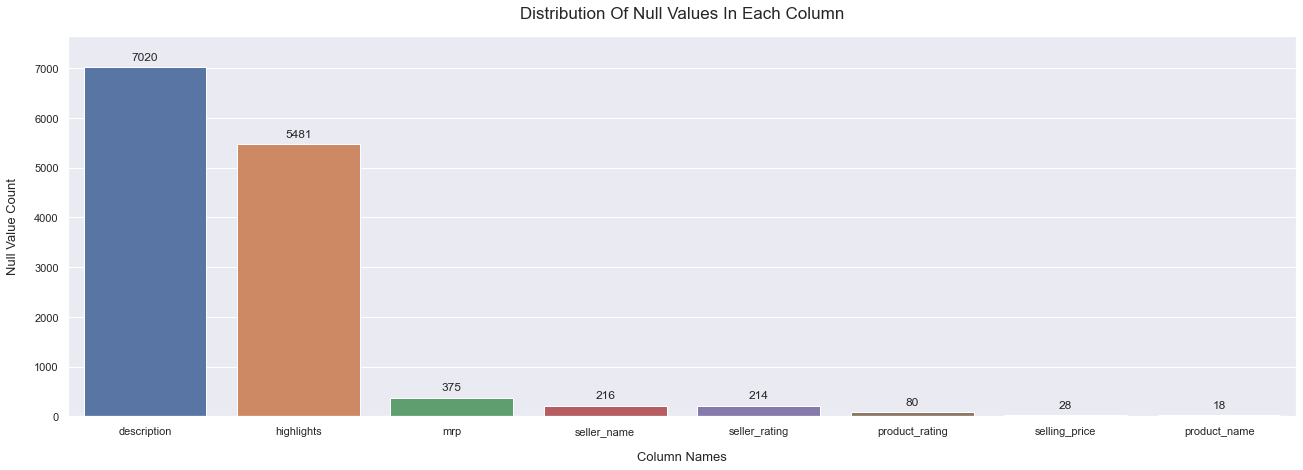

In [17]:
# Let's visualize the distribution of null values using Seaborn's barplot
ax = sns.barplot(x='column_names', y='null_count', data=df_null_count, ci=None)
ax.set_title('Distribution Of Null Values In Each Column', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Null Value Count', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Column Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* There are null values in few columnss like product name, product rating, selling price, mrp, seller name, seller rating, description and highlights column.
* Description have the highest null values about to 7020 as compared to total 12041 values, followed by 5481 null values in highlights column.

***

## Distribution Of Unique Values In Each Column

In [18]:
# Let's compute the count of uniuqe values in each columns
column_names1 = []
unique_counts = []
for name in pd.read_sql_query('show columns from sales', conn).Field.values:
    query = f"""SELECT {name}, COUNT(distinct({name})) AS distinct_count
                FROM sales
                WHERE {name} IS NOT NULL;"""
    
    cur.execute(query)
    res = cur.fetchone()
    if res is not None:
        print(f"Total unique values in {name} : {res[1]}\n")
        column_names1.append(name)
        unique_counts.append(res[1])

Total unique values in main_category : 6

Total unique values in sub_category : 76

Total unique values in product_type : 300

Total unique values in product_name : 10478

Total unique values in product_rating : 33

Total unique values in selling_price : 1816

Total unique values in mrp : 1414

Total unique values in seller_name : 3317

Total unique values in seller_rating : 21

Total unique values in description : 4091

Total unique values in highlights : 5001



In [19]:
# Creating pandas dataframe objects using list and then passing them as dictionary parameters as it won't ask me to rename them additionally
df_unique_count = pd.DataFrame({'column_names':column_names1, 'unique_count':unique_counts}).sort_values('unique_count', ascending=False)
df_unique_count

,column_names,unique_count
3,product_name,10478
10,highlights,5001
9,description,4091
7,seller_name,3317
5,selling_price,1816
6,mrp,1414
2,product_type,300
1,sub_category,76
4,product_rating,33
8,seller_rating,21


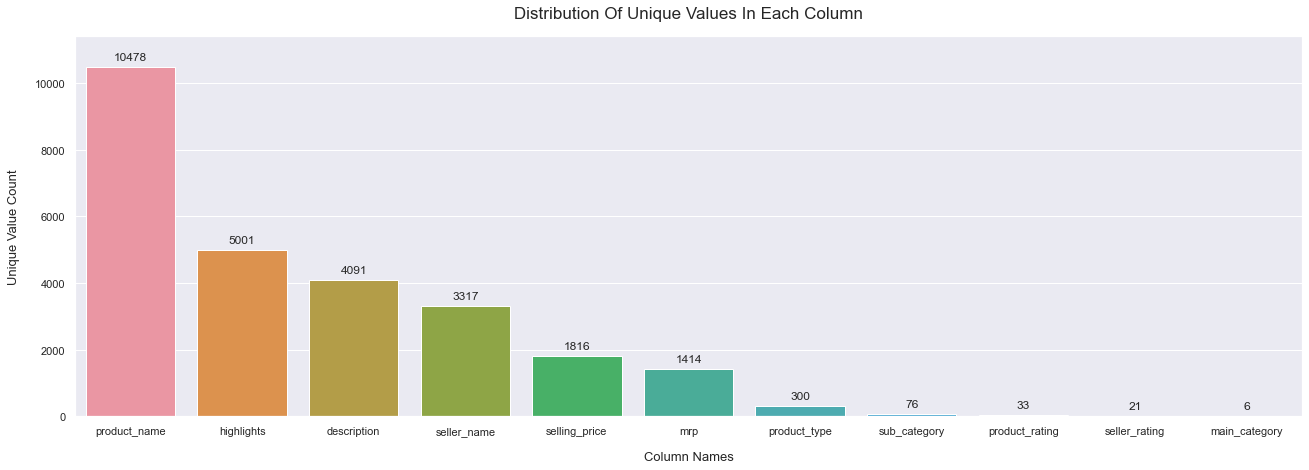

In [20]:
# Let's visualize the distribution of unique values using Seaborn's barplot
ax = sns.barplot(x='column_names', y='unique_count', data=df_unique_count, ci=None)
ax.set_title('Distribution Of Unique Values In Each Column', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Unique Value Count', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Column Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* Most unique values are around 10478 in product name, followed by highlights, description and seller name.
* The data includes 6 main product categories, 76 sub categories and 300 product types and 10478 products with 3317 unique sellers and 1816 different price variations.

***

Now let's drill down a bit further to see how many unique categories are in each category.

## Distribution Of Units Sold In Main Category Of Product

In [21]:
# Let's compute the units sold in the main category of the product
query = """ Select distinct(main_category),
            count(main_category) as units_sold
            from sales
            group by main_category
            order by units_sold desc;"""

df_main_category = pd.read_sql_query(query, conn)
df_main_category

,main_category,units_sold
0,Women's wear,2422
1,Men's wear,2360
2,Bady and Kids,2338
3,Home and Furniture,2120
4,"Sports, Books and More",1820
5,Electronics,981


There is a spelling mistake in main category instead of baby and kids, there is main category like bady and kids.

In [22]:
# Correcting the spelling mistake for Baby and Kids category
query = """ UPDATE sales    
            SET main_category = 'Baby and Kids'    
            WHERE main_category = 'Bady and Kids'; """

cur.execute(query)
conn.commit()

In [23]:
# Let's compute the units sold in the main category of the product
query = """ Select distinct(main_category),
            count(main_category) as units_sold
            from sales
            group by main_category
            order by units_sold desc;"""

df_main_category = pd.read_sql_query(query, conn)
df_main_category

,main_category,units_sold
0,Women's wear,2422
1,Men's wear,2360
2,Baby and Kids,2338
3,Home and Furniture,2120
4,"Sports, Books and More",1820
5,Electronics,981


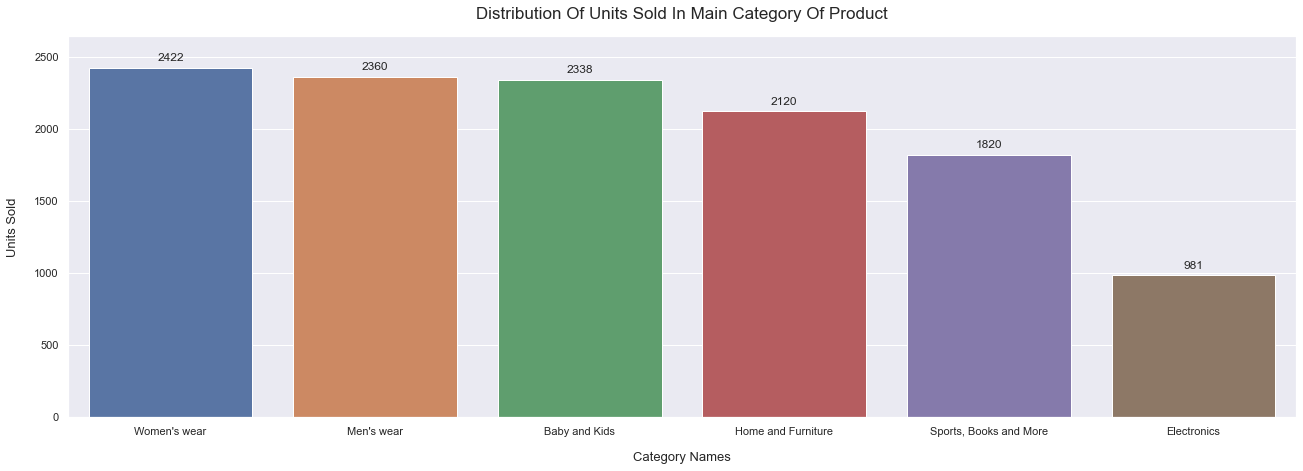

In [24]:
# Let's visualize the distribution of units sold in the main category of the product
ax = sns.barplot(x ='main_category', y='units_sold', data=df_main_category, ci=None)
ax.set_title('Distribution Of Units Sold In Main Category Of Product', fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Category Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* Most of the units sold are in the women's clothing category at around 2422, followed by men's clothing and baby & kids.
* There are 6 main unique categories of product in the data.

***

## Distribution Of Units Sold In Subcategories Of Product

In [25]:
# Let's compute the units sold in sub category of product
query = """ Select distinct(sub_category),
            count(sub_category) as units_sold
            from sales
            where sub_category is not Null
            group by sub_category
            order by units_sold desc; """

df_category2 = pd.read_sql_query(query, conn)
df_category2

,sub_category,units_sold
0,Foot Wear,680
1,Baby Care,640
2,Accessories,600
3,Ethnic Wear,560
4,Toys,458
...,...,...
71,Laptops,24
72,Computer Peripherals,18
73,Cameras,10
74,Gaming and Accessories,5


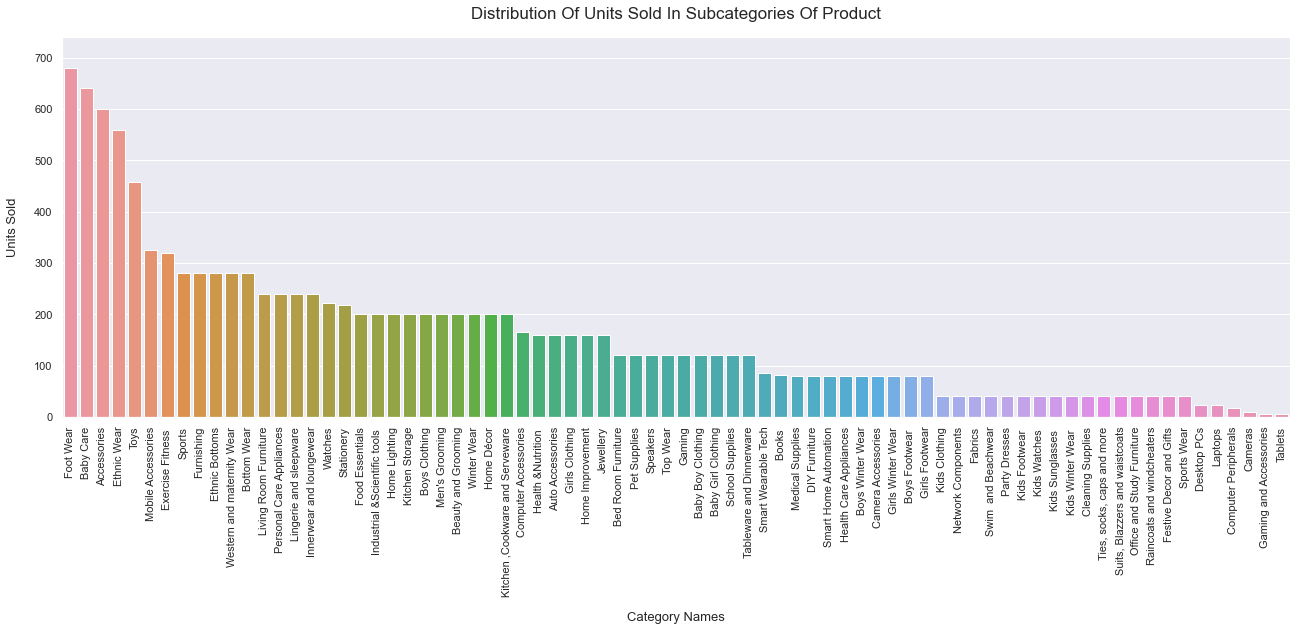

In [26]:
# Let's visualize the distribution of units sold across product subcategories
ax = sns.barplot(x ='sub_category', y='units_sold', data=df_category2, ci=None)
ax.set_title("Distribution Of Units Sold In Subcategories Of Product", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Category Names', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* Most of the units sold are in the footwear category at around 680, followed by baby care, accessories and ethnic wear.
* Data includes 76 sub categories of product.

***

## Distribution Of Units Sold By Product Type

In [27]:
# Let's compute the distribution of units sold by product type
query = """ Select distinct(product_type),
            count(product_type) as units_sold
            from sales
            where product_type is not Null
            group by product_type
            order by units_sold desc
            limit 50;"""

df_category3 = pd.read_sql_query(query, conn)
df_category3

,product_type,units_sold
0,Innerwear,160
1,Shorts,120
2,T -Shirts,120
3,Ethnic Wear,80
4,Luggage and Travel,80
5,Boots,80
6,Jeans,80
7,Sports Shoes,80
8,Casual Shoes,80
9,Sport Shoes,80


It is not a good idea to visualize all product types, because they are too much and we have already visualized the main and sub category of product . Instead we can visualize the top 50 product types.

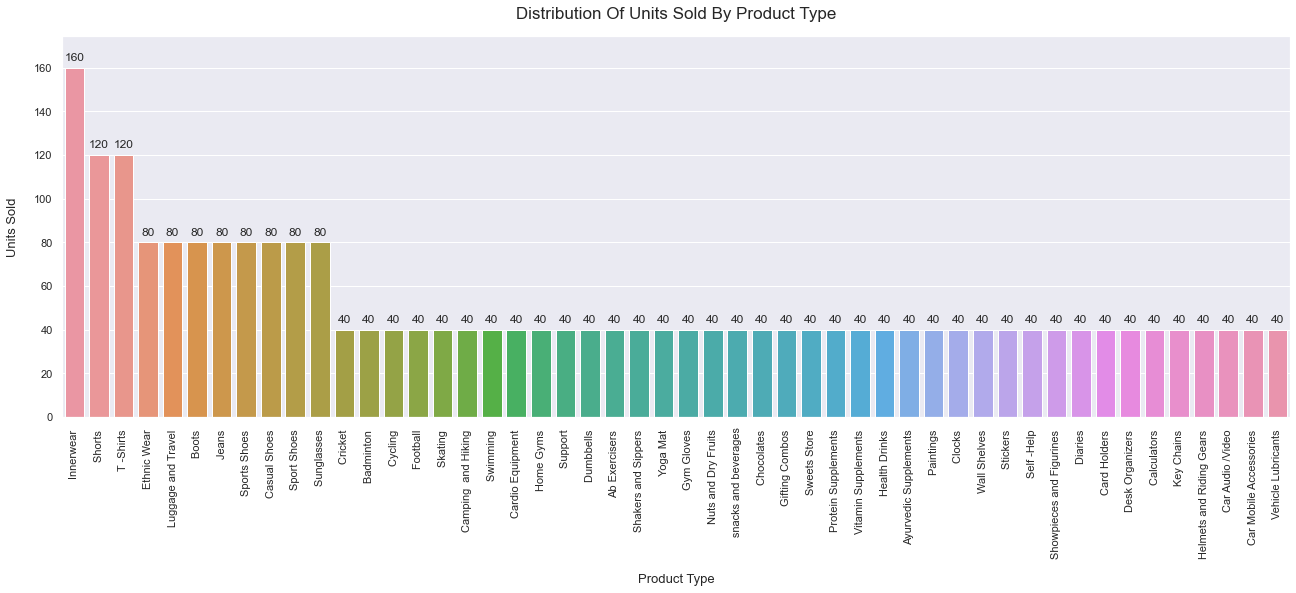

In [28]:
# Let's visualize the distribution of units sold by product type
ax = sns.barplot(x ='product_type', y='units_sold', data=df_category3, ci=None)
ax.set_title("Distribution Of Units Sold By Product Type", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Type', labelpad=15, fontdict={'size':13})
ax.bar_label(ax.containers[0], padding=5)
plt.show()

#### Inferences
* Most of the products sold fall under the innerwear category of about 160 products, followed by shorts and T-shirts.
* There are approximately 300 unique categories of product types in the data.

***

## Distribution Of Products Fall Within Each Category Of Product Rating

In [29]:
# Let's compute the distribution of products fall within each category of product rating
query = """ Select distinct(product_rating),
            count(product_rating) as units_sold
            from sales
            where product_rating is not null
            group by product_rating
            order by units_sold desc; """

df_product_rating = pd.read_sql_query(query, conn)
df_product_rating

,product_rating,units_sold
0,4.0,1697
1,4.1,1692
2,4.2,1495
3,4.3,1343
4,3.9,1234
5,3.8,886
6,4.4,838
7,3.7,542
8,4.5,427
9,3.6,354


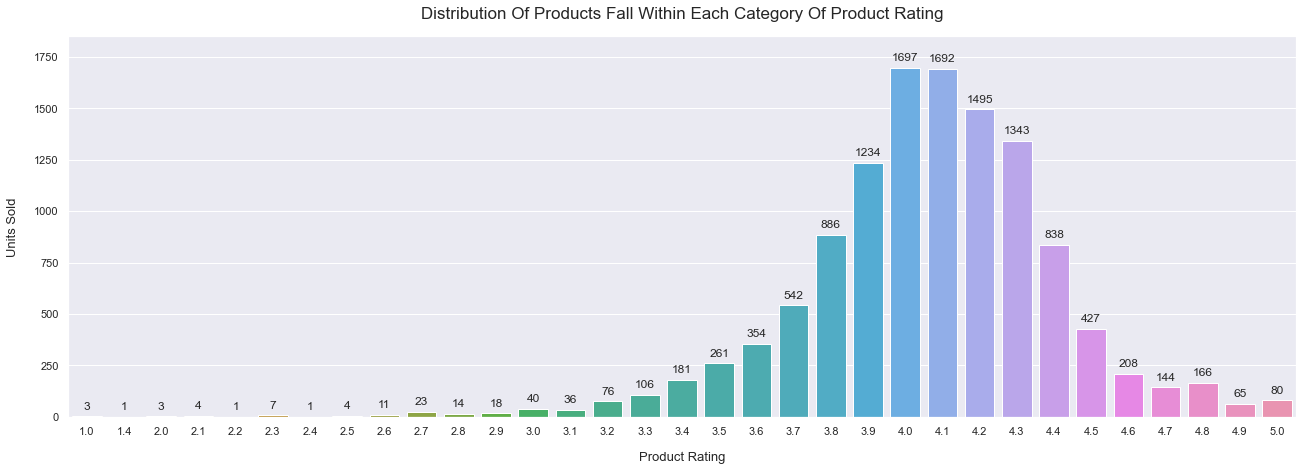

In [30]:
# Let's visualize the distribution of products fall within each category of product rating
ax = sns.barplot(x ='product_rating', y='units_sold', data=df_product_rating, ci=None)
ax.set_title("Distribution Of Products Fall Within Each Category Of Product Rating", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Rating', labelpad=15, fontdict={'size':13})
ax.bar_label(ax.containers[0], padding=5)
plt.show()

#### Inferences
* Most products sold fall in the rating range of 4.0, around 1697, followed by 4.1 around 1692, then product rating 4.2 and 4.3.
* There are 33 categories of product ratings in the data.
* Product ratings range from 1.0 to 5.0 stars.

***

## Distribution Of Seller Ratings

In [31]:
# Let's compute how many products fall in each category of seller rating
query = """ Select distinct(seller_rating), count(seller_rating) as units_sold
            from sales
            where seller_rating is not null
            group by seller_rating
            order by units_sold desc; """

df_seller_rating = pd.read_sql_query(query, conn)
df_seller_rating

,seller_rating,units_sold
0,4.8,1565
1,4.7,1382
2,4.4,1241
3,4.9,1097
4,4.3,957
5,4.6,956
6,4.1,917
7,4.2,796
8,3.9,582
9,4.0,544


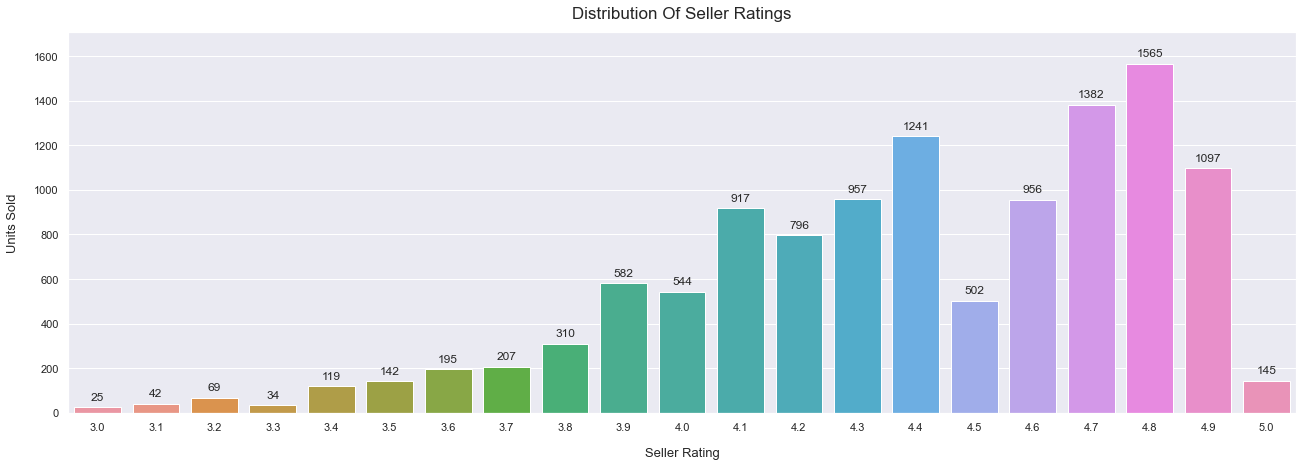

In [32]:
# Let's visualize the distribution of Seller Ratings
ax = sns.barplot(x='seller_rating', y='units_sold', data=df_seller_rating, ci=None)
ax.set_title("Distribution Of Seller Ratings", fontdict={'size':17}, y=1.02)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Units Sold', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Rating', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* Most products sold have a seller rating of 4.8 around 1565, followed by seller ratings of 4.7 and 4.7.
* Data includes 21 unique categories of seller ratings.
* Seller ratings range from 3.0 to 5.0 stars.

***

## Distribution Of Selling Price

In [33]:
# The values are stored in text format, we need to convert them to float and remove unwanted characters.
cur.execute("UPDATE sales SET selling_price = REPLACE(selling_price, '₹', '');")
cur.execute("UPDATE sales SET selling_price = REPLACE(selling_price, ',', '');")
cur.execute("ALTER TABLE sales MODIFY COLUMN selling_price INT;")
conn.commit()

In [34]:
# Let's compute distribution of selling price
query = """ select distinct(selling_price) as selling_price,
            count(selling_price) as units_sold
            from sales
            where selling_price is not Null
            group by selling_price
            order by selling_price;"""

df_selling_price = pd.read_sql_query(query, conn)
df_selling_price

,selling_price,units_sold
0,10,1
1,51,2
2,59,3
3,62,1
4,63,1
...,...,...
1811,154890,1
1812,180990,1
1813,189990,1
1814,199690,1


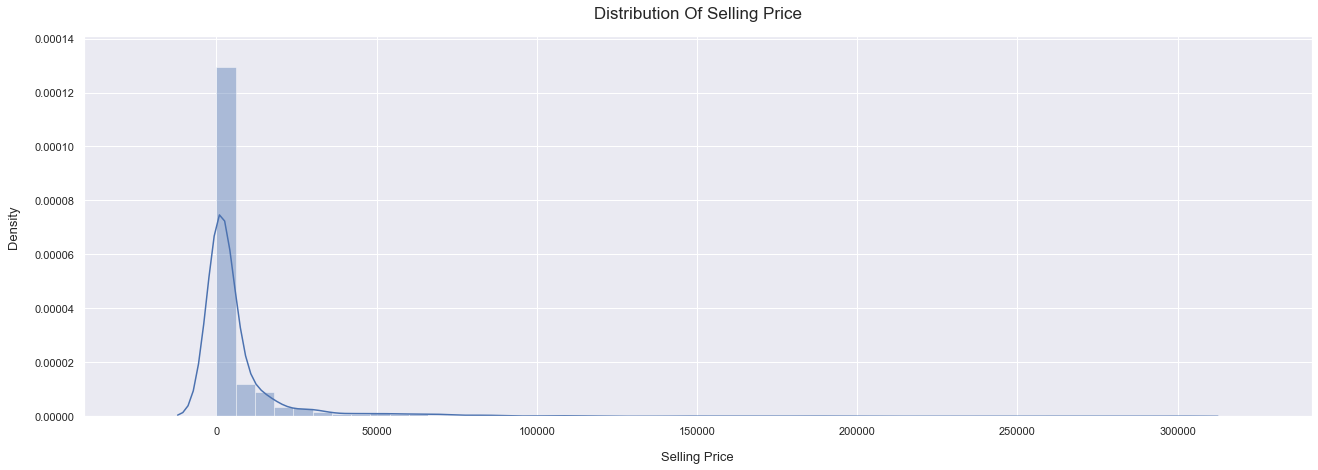

In [35]:
# Let's visualize the distribution of selling price
import matplotlib.ticker as ticker
ax = sns.distplot(df_selling_price['selling_price'])
ax.set_title('Distribution Of Selling Price', fontdict={'size':17}, y=1.03)
ax.set_ylabel('Density', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Selling Price', labelpad=15, fontdict={'size':13})
formatter = ticker.ScalarFormatter() # create a ScalarFormatter object
ax.xaxis.set_major_formatter(formatter) # apply the formatter to the x-axis ticks
ax.yaxis.set_major_formatter(formatter) # apply the formatter to the y-axis ticks
plt.show()

#### Inferences
* Most units sold are priced at Rs.299.0 approximately 498 units, followed by products priced at Rs.499.0 and Rs.399.0.
* Total 1754 products have been sold which are below Rs.50000. And only 62 products were sold above the selling price of Rs.50000.
* Only one unit is sold for the product whose minimum price is Rs.10.0 and one unit is sold whose price is Rs.300490.
* There are 1816 unique price amounts for different products in the data.
* Selling price ranges from Rs.10.0 to Rs.300490.0.

***

## Distribution Of MRP

In [37]:
# The values are stored in text format, we need to convert them to float and remove unwanted characters.
cur.execute("UPDATE sales SET mrp = REPLACE(mrp, '₹', '');")
cur.execute("UPDATE sales SET mrp = REPLACE(mrp, ',', '');")
cur.execute("ALTER TABLE sales MODIFY COLUMN mrp INT;")
conn.commit()

In [38]:
# Let's compute the distribution of mrp
query = """ select distinct(mrp) as mrp,
            count(mrp) as units_sold
            from sales
            where mrp is not Null
            group by mrp
            order by mrp;"""

df_mrp = pd.read_sql_query(query, conn)
df_mrp

,mrp,units_sold
0,65,2
1,70,1
2,75,1
3,79,1
4,80,1
...,...,...
1409,188900,1
1410,190400,1
1411,229490,1
1412,287304,1


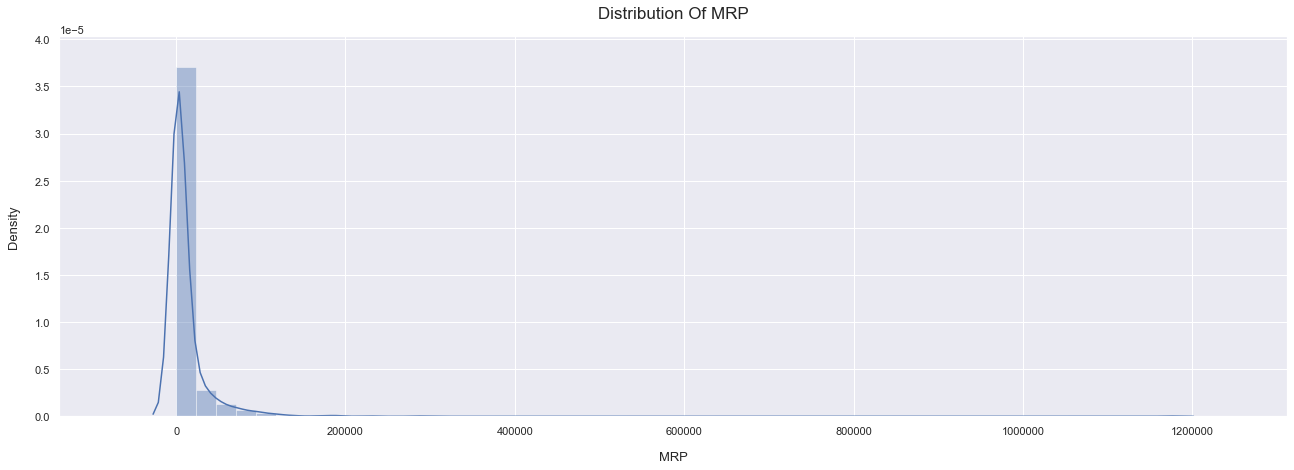

In [39]:
# Let's visualize the distribution of MRP
ax = sns.distplot(df_mrp['mrp'])
ax.set_title('Distribution Of MRP', fontdict={'size':17}, y=1.03)
ax.set_ylabel('Density', labelpad=15, fontdict={'size':13})
ax.set_xlabel('MRP', labelpad=15, fontdict={'size':13})
formatter = ticker.ScalarFormatter() # create a ScalarFormatter object
ax.xaxis.set_major_formatter(formatter) # apply the formatter to the x-axis ticks
ax.yaxis.set_major_formatter(formatter) # apply the formatter to the y-axis ticks
plt.show()

#### Inferences
* Most of the products sold come under MRP of Rs. 999.0 approximately for 1429 units, followed by Rs. 1999.
* Total 1332 products are sold which come under MRP of Rs.50000 and only 81 products are sold above MRP of Rs.50000.
* In MRP column there are only two units of the product which has minimum price of Rs.65.0 have been sold and one unit has been sold which has minimum price of Rs.1174131.0.
* Data includes 1414 unique MRP amounts for various products.
* MRP ranges from Rs.65.0 to Rs.1174131.0.

***

## Distribution Of Average Discounts Offered In Each Main Product Category

In [40]:
# Let's compute the average discount offered in each main category of product
query = """ select distinct(main_category) as main_category, 
            round(avg(mrp), 2) as avg_mrp,
            round(avg(selling_price), 2) as avg_selling_price,
            round(avg(mrp - selling_price), 2) as price_difference,
            round(avg((1 - (selling_price / mrp))*100), 2) as avg_discount
            from sales
            where mrp is not null
            group by main_category
            order by avg_discount desc;"""

df_discount = pd.read_sql_query(query, conn)
df_discount

,main_category,avg_mrp,avg_selling_price,price_difference,avg_discount
0,Women's wear,1914.99,756.88,1158.11,61.57
1,Men's wear,2122.38,864.02,1258.36,56.23
2,Baby and Kids,1232.45,510.16,722.29,54.31
3,Home and Furniture,4436.17,2253.96,2182.21,53.53
4,Electronics,10499.90,6688.95,3810.95,52.03
5,"Sports, Books and More",3159.18,1523.49,1635.69,46.53


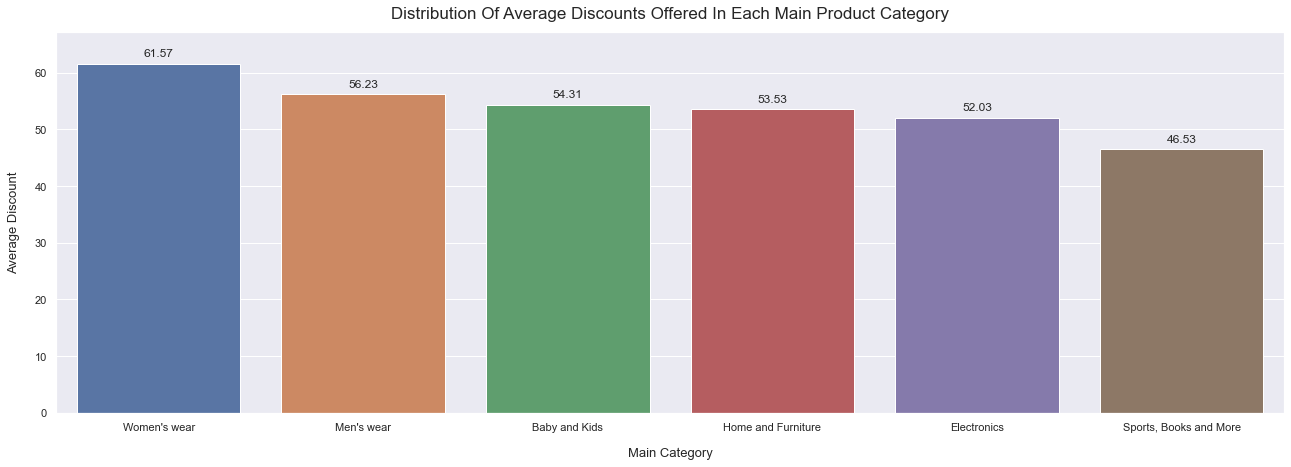

In [41]:
# Let's visualize the distribution of average discount offered in each main category of product
ax = sns.barplot(x='main_category', y='avg_discount', data=df_discount, ci=None)
ax.set_title("Distribution Of Average Discounts Offered In Each Main Product Category", fontdict={'size':17}, y=1.02)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Average Discount', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Main Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* The main category of women's apparel has the highest average discount of around 61.57% on most products, followed by discounts on men's apparel and baby and children's products.
* There are total 5 unique main categories of the product.
* Average discount ranges from 46.53 to 61.57%.

***

## Distribution Of Average Discount Offered In Each Subcategory Of The Product

In [42]:
# Let's compute the average discount offered in each subcategory of the product
query = """ select distinct(sub_category) as sub_category, 
            round(avg(mrp), 2) as avg_mrp,
            round(avg(selling_price), 2) as avg_selling_price,
            round(avg(mrp - selling_price), 2) as price_difference,
            round(avg((1 - (selling_price / mrp))*100), 2) as avg_discount
            from sales
            where mrp is not null
            group by sub_category
            order by avg_discount desc;"""

df_discount1 = pd.read_sql_query(query, conn)
df_discount1

,sub_category,avg_mrp,avg_selling_price,price_difference,avg_discount
0,Party Dresses,2196.70,475.25,1721.45,78.41
1,Kids Sunglasses,1359.31,261.44,1097.87,77.29
2,Kids Watches,1287.73,262.83,1024.90,76.05
3,Top Wear,1733.29,410.76,1322.53,75.44
4,Kids Clothing,1579.75,368.50,1211.25,73.86
...,...,...,...,...,...
71,Pet Supplies,1016.82,744.55,272.27,29.73
72,Laptops,145450.21,78492.67,66957.54,29.33
73,Gaming and Accessories,43179.60,32723.60,10456.00,28.46
74,Computer Peripherals,22924.65,16690.06,6234.59,19.80


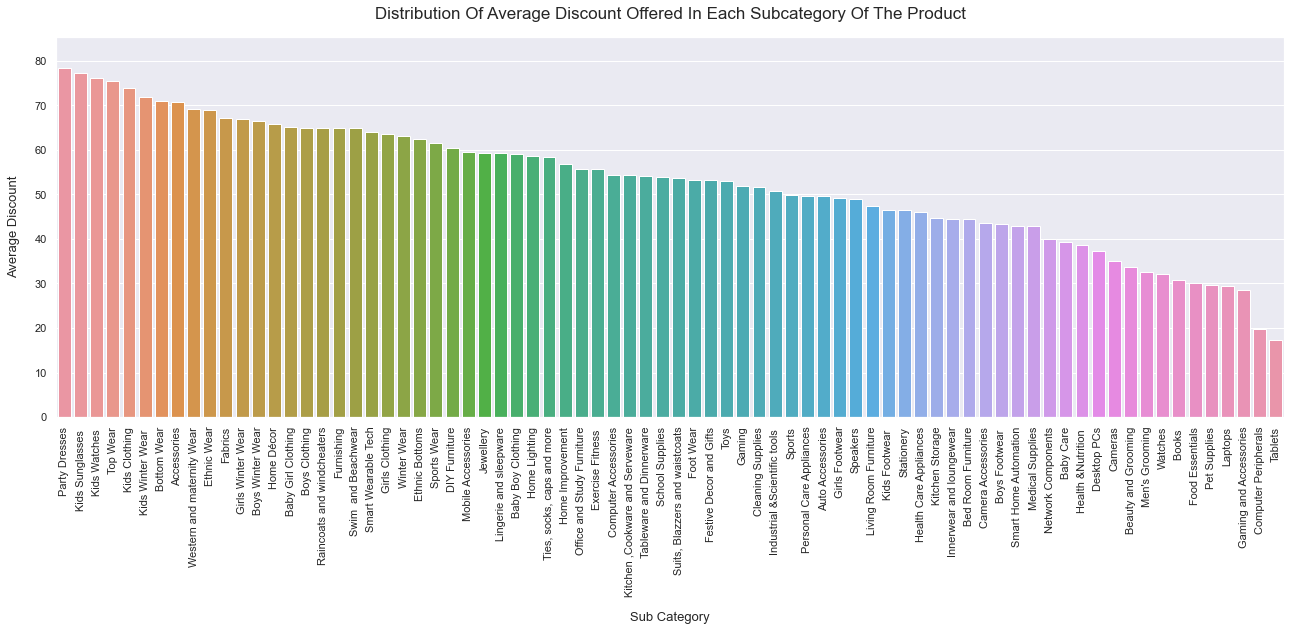

In [43]:
# Let's visualize the distribution of average discount offered in each subcategory of the product
ax = sns.barplot(x='sub_category', y='avg_discount', data=df_discount1, ci=None)
ax.set_title("Distribution Of Average Discount Offered In Each Subcategory Of The Product", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Average Discount', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Sub Category', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()

#### Inferences
* Most of the products which fall under the sub category party dresses have an average discount of around 78.41%, followed by kids sunglasses and kids watches.
* There are a total of 76 unique sub categories of the product.
* Average discount ranges from 17.39 to 78.41%.

***

## Distribution Of Average Discount Offered For Each Product Type

In [44]:
# Let's compute the distribution of average discount offered for each product type
query = """ select distinct(product_type) as product_type, 
            round(avg(mrp), 2) as avg_mrp,
            round(avg(selling_price), 2) as avg_selling_price,
            round(avg(mrp - selling_price), 2) as price_difference,
            round(avg((1 - (selling_price / mrp))*100), 2) as avg_discount
            from sales
            where mrp is not null
            group by product_type
            order by avg_discount desc
            limit 50;"""

df_discount2 = pd.read_sql_query(query, conn)
df_discount2

,product_type,avg_mrp,avg_selling_price,price_difference,avg_discount
0,Artificial Jewellery,2019.90,229.08,1790.83,85.89
1,Track pants,2107.28,351.30,1755.98,82.18
2,Sarees,3240.78,572.55,2668.23,80.51
3,Belts,1549.06,315.18,1233.88,79.03
4,Dress Material,1814.35,350.48,1463.88,78.65
5,Party Dresses,2196.70,475.25,1721.45,78.41
6,Jewellery,1527.83,444.08,1083.75,77.97
7,Kids Sunglasses,1359.31,261.44,1097.87,77.29
8,Kurta Sets and Salwar Suits,3264.25,706.35,2557.90,77.16
9,Lehenga Choli,3168.13,678.18,2489.95,76.40


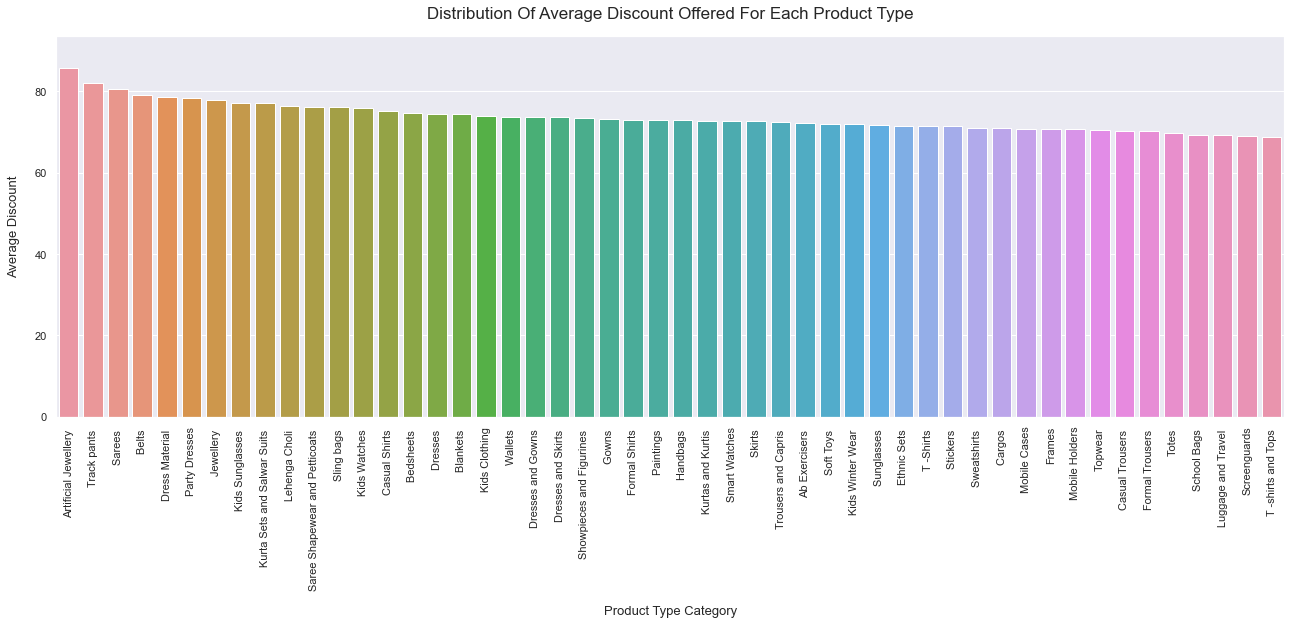

In [45]:
# Let's visualize the distribution of average discount offered for each product type
ax = sns.barplot(x='product_type', y='avg_discount', data=df_discount2, ci=None)
ax.set_title("Distribution Of Average Discount Offered For Each Product Type", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Average Discount', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Type Category', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()

#### Inferences
* Most of the products which fall under product type artificial jewelery have an average discount of around 85.89%, followed by track pants and sarees.
* There are 300 unique product types in total.
* Average discount ranges from 68.86 to 85.89%.

***

## Distribution Of The Most Expensive Product In Each Main Category

In [46]:
# Let's compute the distribution of the most expensive product in each main category
query = """ Select main_category,
            max(selling_price) as max_selling_price
            from sales
            where selling_price is not null
            group by main_category
            order by max_selling_price desc;"""

df_max_selling_price = pd.read_sql_query(query, conn)
df_max_selling_price

,main_category,max_selling_price
0,Electronics,300490
1,Women's wear,85360
2,"Sports, Books and More",85000
3,Home and Furniture,49999
4,Baby and Kids,45599
5,Men's wear,16495


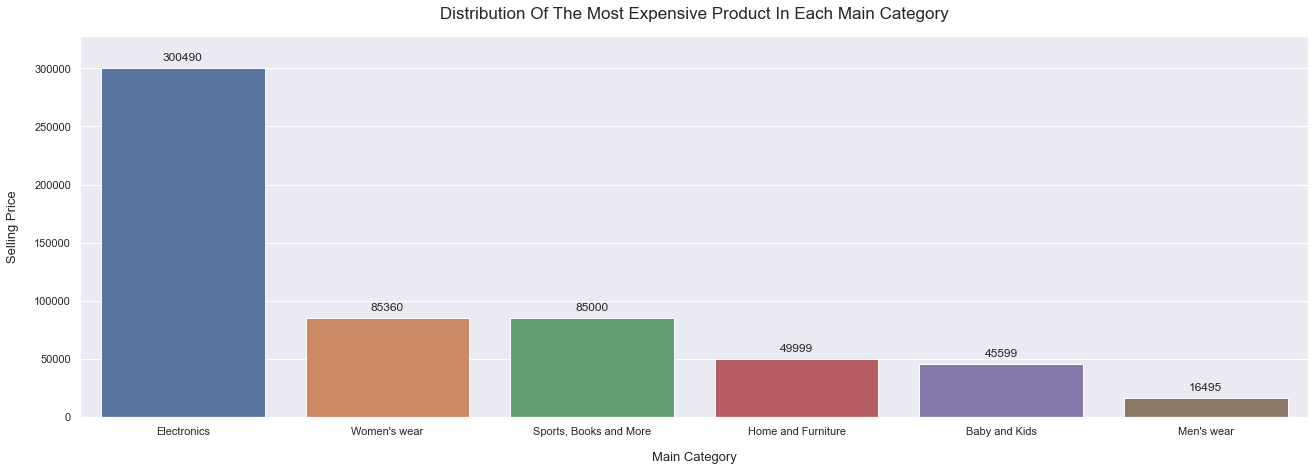

In [47]:
# Let's visualize the distribution of the most expensive product in each main category
ax = sns.barplot(x ='main_category', y='max_selling_price', data=df_max_selling_price, ci=None)
ax.set_title("Distribution Of The Most Expensive Product In Each Main Category", fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Main Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* In Main Category, Electronics have the most expensive product of Rs. 300490 followed by Women's wear and Sports, Books and More.
* Most Expensive Product ranges from Rs. 16495 to Rs. 300490.

***

## Distribution Of The Most Expensive Product In Each Subcategory Of The Produc

In [48]:
# Let's compute the distribution of the most expensive product in each subcategory of the product
query = """ Select sub_category,
            max(selling_price) as max_selling_price
            from sales
            where selling_price is not null
            group by sub_category
            order by max_selling_price desc;"""

df_max_selling_price1 = pd.read_sql_query(query, conn)
df_max_selling_price1

,sub_category,max_selling_price
0,Laptops,300490
1,Camera Accessories,199690
2,Desktop PCs,189990
3,Cameras,97995
4,Jewellery,85360
...,...,...
71,Kids Clothing,809
72,"Ties, socks, caps and more",799
73,Festive Decor and Gifts,683
74,Kids Sunglasses,479


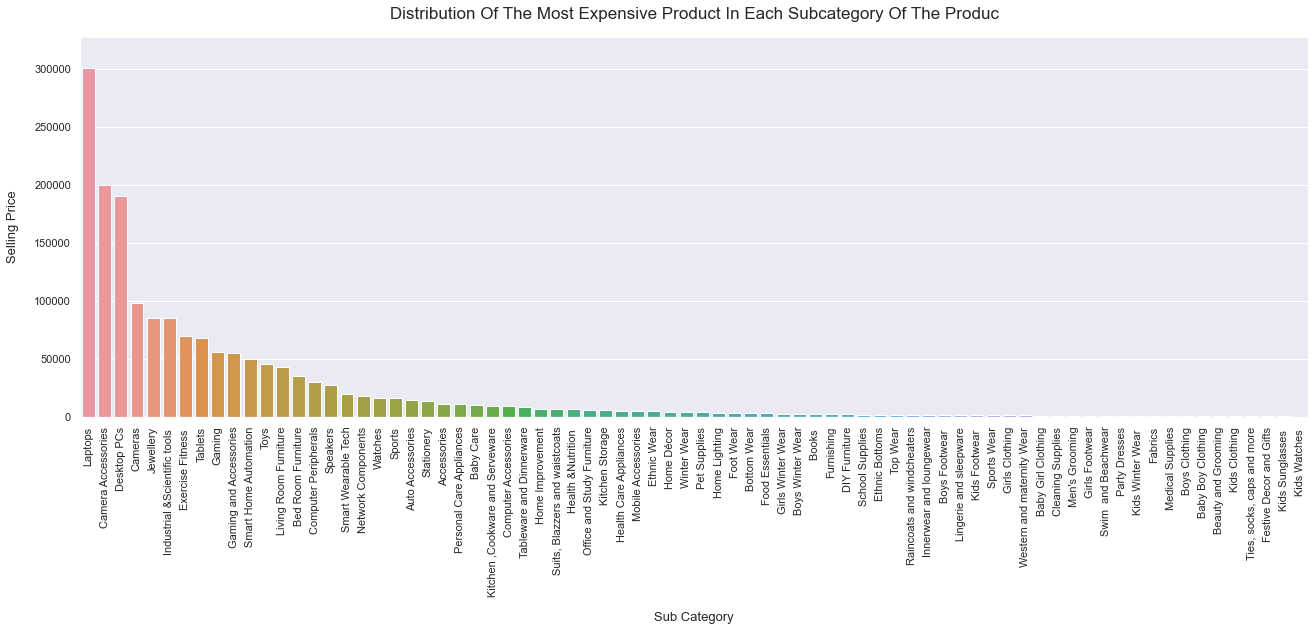

In [49]:
# Let's visualize the distribution of the most expensive product in each subcategory of the product
ax = sns.barplot(x ='sub_category', y='max_selling_price', data=df_max_selling_price1, ci=None)
ax.set_title("Distribution Of The Most Expensive Product In Each Subcategory Of The Produc", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Sub Category', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()

#### Inferences
* In Sub Category, The most expensive product is Laptop Rs. 300490 are followed by Camera Accessories and Desktop PCs.
* Most expensive products ranging from Rs. 16495 to Rs. 300490.

***

## Distribution Of The Top 50 Most Expensive Products

In [50]:
# Let's compute the distribution of the top 50 most expensive products
query = """ Select product_type,
            max(selling_price) as max_selling_price
            from sales
            where selling_price is not null
            group by product_type
            order by max_selling_price desc
            limit 50;"""

df_max_selling_price2 = pd.read_sql_query(query, conn)
df_max_selling_price2

,product_type,max_selling_price
0,Gaming Laptops,300490
1,Lens,199690
2,Desktop PCs,189990
3,DSLR and Mirrorless,97995
4,Coins and Bars,85360
5,Industrial Testing Devices,85000
6,Cardio Equipment,69999
7,Apple Ipads,68079
8,Gaming Consoles,55990
9,Gaming and Accessories,54890


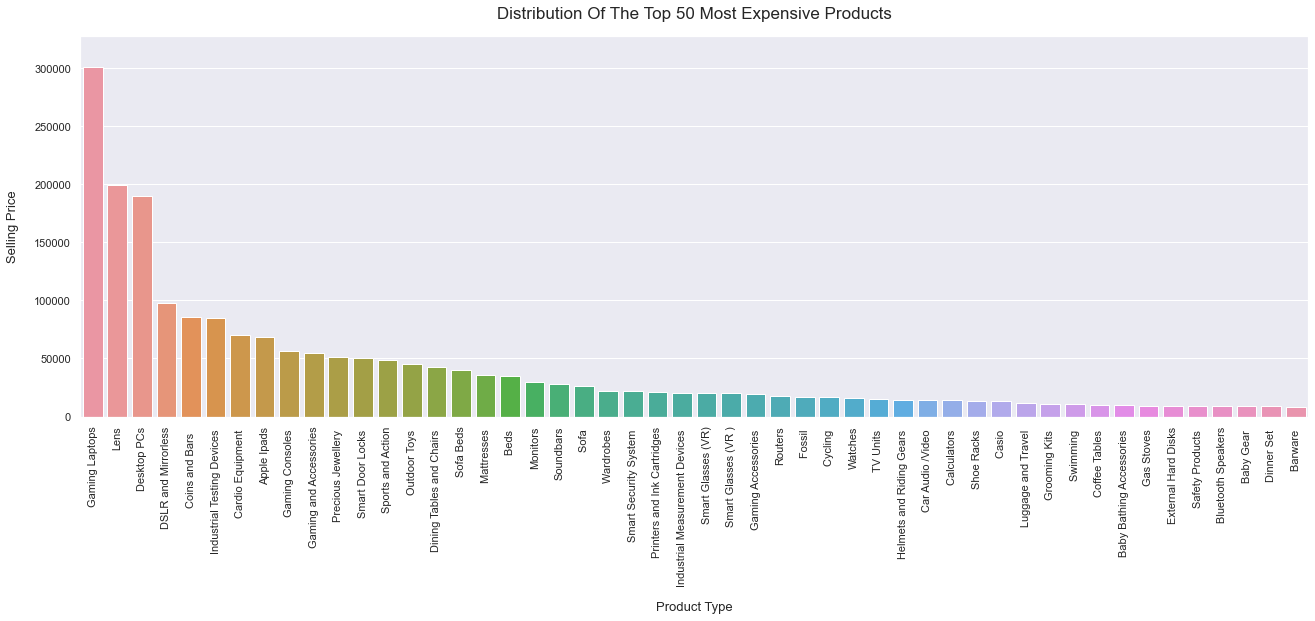

In [51]:
# Let's visualize the distribution of the top 50 most expensive products
ax = sns.barplot(x ='product_type', y='max_selling_price', data=df_max_selling_price2, ci=None)
ax.set_title("Distribution Of The Top 50 Most Expensive Products", fontdict={'size':17}, y=1.03)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Product Type', labelpad=15, fontdict={'size':13})
plt.xticks(rotation=90)
plt.show()

#### Inferences
* The most expensive product is Gaming Laptop priced at Rs. 300490, followed by Lens and Desktop PC.
* Top 50 most expensive products ranging from Rs. 16495 to Rs. 300490.

***

## Distribution Of The Top 50 Sellers By Most Expensive Product

In [52]:
# Let's compute the distribution of the top 50 sellers by most expensive product
query = """ Select seller_name,
            max(selling_price) as most_expensive_product
            from sales 
            where seller_name is not null
            group by seller_name
            order by most_expensive_product desc
            limit 50;"""

df_expensive_product = pd.read_sql_query(query, conn)
df_expensive_product

,seller_name,most_expensive_product
0,PETILANTE Online,300490
1,RetailNet,199690
2,OmniTechRetail,189990
3,TBsmart,118995
4,TheAstrum,101645
5,CORSECA,97995
6,MMTCPAMP,85360
7,TREASURE HAUL ONLINE,82990
8,TBL Online,81900
9,TheBrandPartner,78890


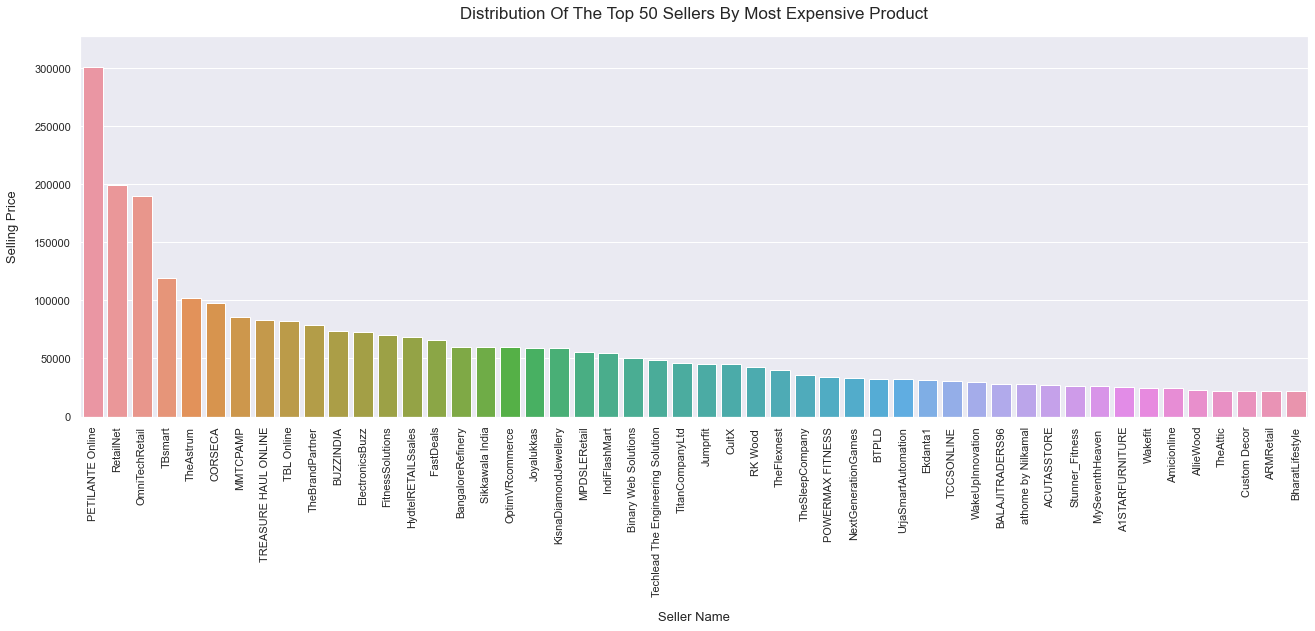

In [53]:
# Let's visualize the distribution of the top 50 sellers by most expensive product
ax = sns.barplot(x ='seller_name', y='most_expensive_product', data=df_expensive_product, ci=None)
ax.set_title("Distribution Of The Top 50 Sellers By Most Expensive Product", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Selling Price', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Name', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* The most expensive product is Rs.300490 from seller PETILANTE Online, followed by Retailnet and Omnitechretail.
* The most expensive product ranges from Rs.21599 to Rs.300490 for the top 50 sellers.

***

## Distribution Of Top 50 Sellers By Sales Volume

In [54]:
# Let's compute the distribution of top 50 sellers by sales volume
query = """ Select seller_name,
            count(seller_name) as total_sales
            from sales 
            where seller_name is not null
            group by seller_name
            order by total_sales desc
            limit 50;"""

df_total_sales = pd.read_sql_query(query, conn)
df_total_sales

,seller_name,total_sales
0,RetailNet,601
1,SuperComNet,266
2,MYTHANGLORYRetail,258
3,HSAtlastradeFashion,257
4,SURICYBCOMBazaar,193
5,DIIATBonline,154
6,Wizrob Fashion,137
7,TRIPR,94
8,MTAILMODEECOM,81
9,SUGSHAANnet,62


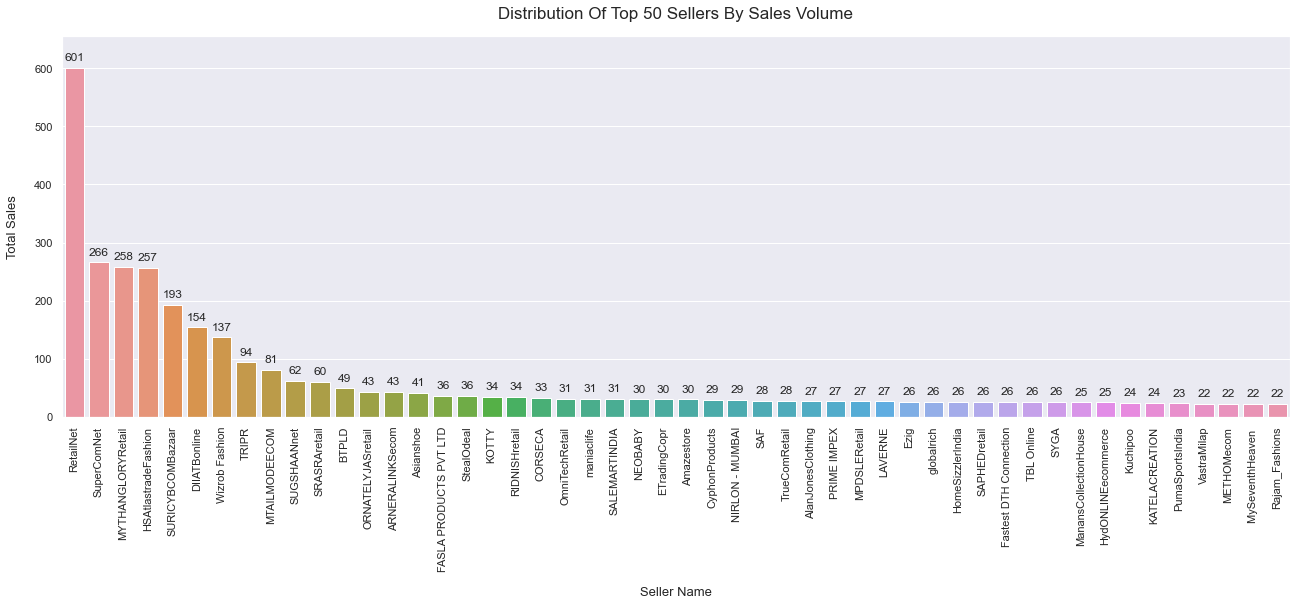

In [55]:
# Let's visualize the distribution of top 50 sellers by sales volume
ax = sns.barplot(x ='seller_name', y='total_sales', data=df_total_sales, ci=None)
ax.set_title("Distribution Of Top 50 Sellers By Sales Volume", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Total Sales', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Name', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* Seller RetailNet has the highest sales volume of 601, followed by SuperComNet, MythangloryRetail and HSAtlastradeFashion. 
* Sales volume ranges from 22 to 601.

***

## Distribution Of Unique Sellers In Each Category Of Product Rating

In [56]:
# Let's compute the distribution of unique sellers in each category of product rating
query =""" SELECT product_rating,
           count(distinct(seller_name)) as unique_sellers
           FROM sales
           where product_rating is not null
           GROUP BY product_rating; """

df_unique_sellers = pd.read_sql_query(query, conn)
df_unique_sellers

,product_rating,unique_sellers
0,1.0,3
1,1.4,1
2,2.0,1
3,2.1,1
4,2.2,1
5,2.3,2
6,2.4,0
7,2.5,3
8,2.6,3
9,2.7,2


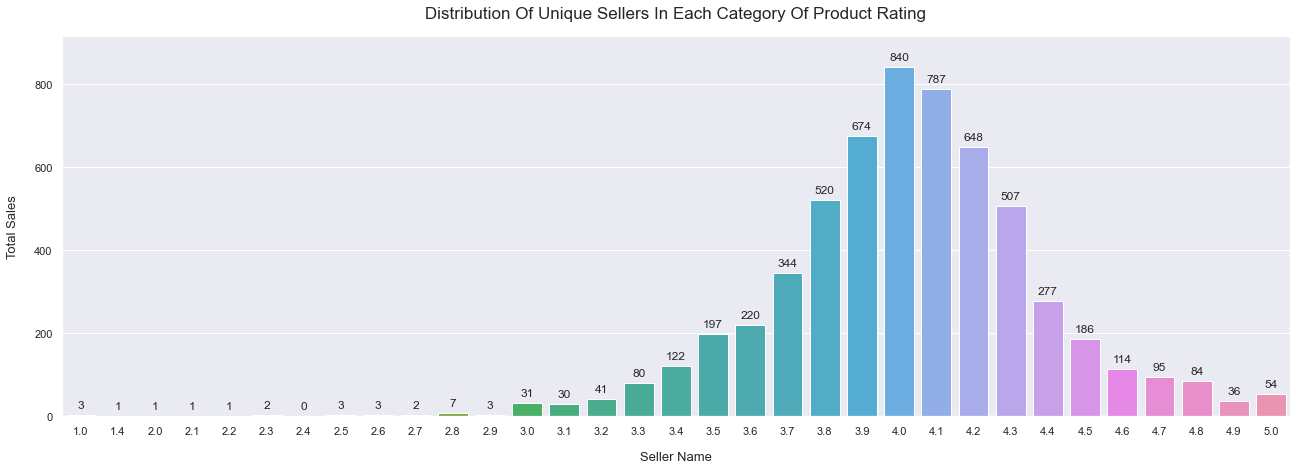

In [57]:
# Let's visualize the distribution of unique sellers in each category of product rating
ax = sns.barplot(x ='product_rating', y='unique_sellers', data=df_unique_sellers, ci=None)
ax.set_title("Distribution Of Unique Sellers In Each Category Of Product Rating", fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Total Sales', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Seller Name', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* Most seller are in the category of product rating of 4.0 stars about 840, followed by 4.1, 3.9 and 4.2 stars.
* Number of unique seller ranges from 3 to 840.
* Product rating ranges from 1.0 stars to 5.0 stars.

***

## Distribution Of Unique Sellers In Each Main Product Category

In [58]:
# Let's compute the distribution of unique sellers in each main product category
query =""" SELECT main_category,
           (count(distinct(seller_name))) as unique_sellers
           FROM sales where seller_name is not null
           GROUP BY main_category
           order by unique_sellers desc;"""

df_cat1_unique_sellers = pd.read_sql_query(query, conn)
df_cat1_unique_sellers

,main_category,unique_sellers
0,Women's wear,822
1,Home and Furniture,815
2,Baby and Kids,692
3,Men's wear,581
4,"Sports, Books and More",528
5,Electronics,310


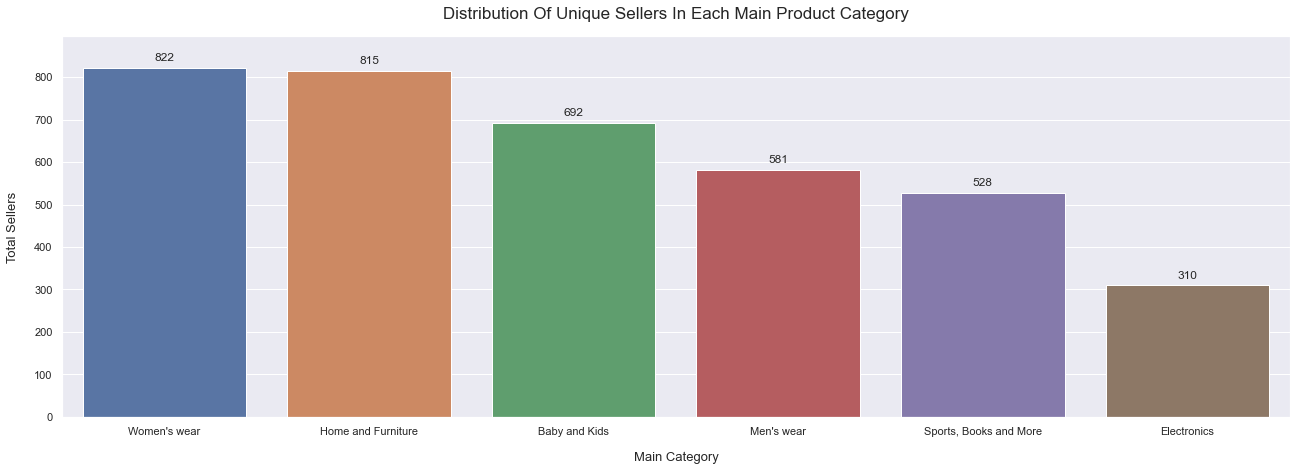

In [59]:
# Let's visualize the distribution of unique sellers in each main product category
ax = sns.barplot(x ='main_category', y='unique_sellers', data=df_cat1_unique_sellers, ci=None)
ax.set_title("Distribution Of Unique Sellers In Each Main Product Category", fontdict={'size':17}, y=1.03)
ax.bar_label(ax.containers[0], padding=5)
ax.set_ylabel('Total Sellers', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Main Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* In the main category of product, Women's Wear has the most unique sellers about 822, followed by Home and Furniture and Baby and Kids.
* Total unique seller ranges from 310 to 822.

***

## Distribution Of Unique Sellers In Each Subcategory Of The Product

In [60]:
# Let's compute the distribution of unique sellers in each subcategory of the product
query =""" SELECT sub_category,
           (count(distinct(seller_name))) as unique_sellers
           FROM sales
           where seller_name is not null
           GROUP BY sub_category
           order by unique_sellers desc; """

df_cat2_unique_sellers = pd.read_sql_query(query, conn)
df_cat2_unique_sellers

,sub_category,unique_sellers
0,Ethnic Wear,227
1,Toys,207
2,Foot Wear,192
3,Accessories,162
4,Baby Care,142
...,...,...
71,Network Components,6
72,Cameras,6
73,Gaming and Accessories,5
74,Computer Peripherals,5


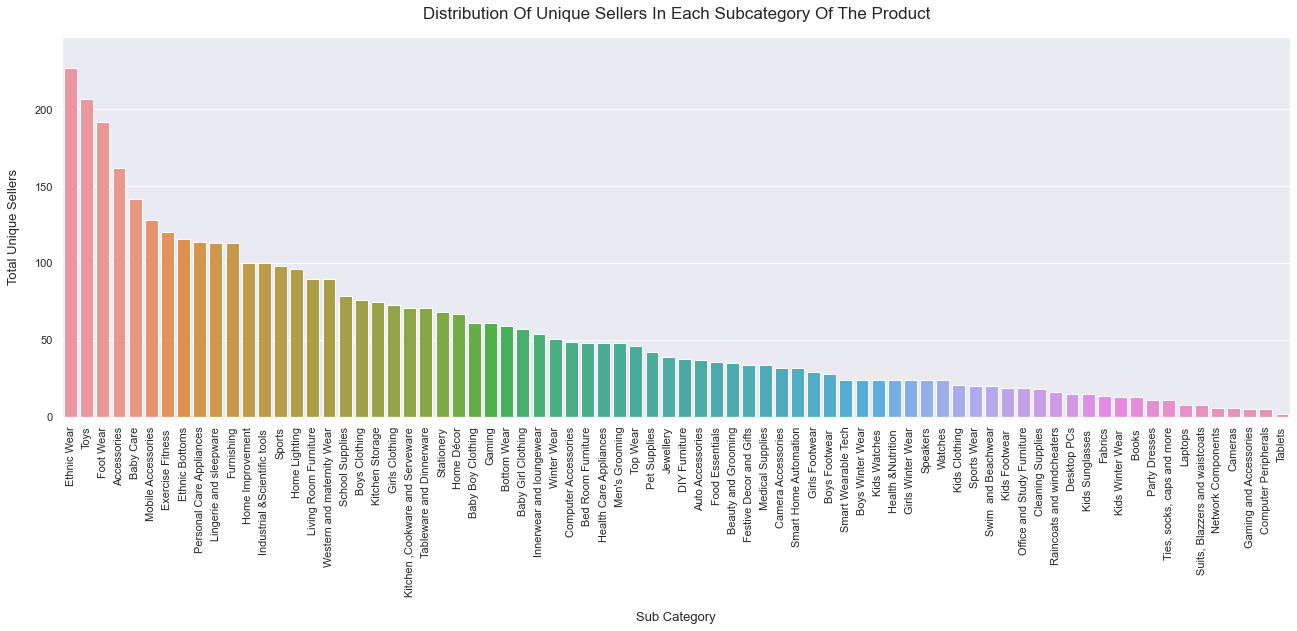

In [61]:
# Let's visualize the distribution of unique sellers in each subcategory of the product
ax = sns.barplot(x ='sub_category', y='unique_sellers', data=df_cat2_unique_sellers, ci=None)
ax.set_title("Distribution Of Unique Sellers In Each Subcategory Of The Product", fontdict={'size':17}, y=1.03)
plt.xticks(rotation=90)
ax.set_ylabel('Total Unique Sellers', labelpad=15, fontdict={'size':13})
ax.set_xlabel('Sub Category', labelpad=15, fontdict={'size':13})
plt.show()

#### Inferences
* In the product sub-category, ethnic wear has the most unique sellers around 227, followed by toys and footwear.
* Total unique sellers range from 2 to 227.

****

In [62]:
# Let's commit the changes and disconnect the connection with mysql
conn.commit()
cur.close()
conn.close()
print("Done")

Done


***

# Conclusion
1. Sales table has total 12041 rows and total 11 columns.
2. There are null values in few columnss like product name, product rating, selling price, mrp, seller name, seller rating, description and highlights column.
3. Description have the highest null values about to 7020 as compared to total 12041 values, followed by 5481 null values in highlights column.
4. Most unique values are around 10478 in product name, followed by highlights, description and seller name.
5. The data includes 6 main product categories, 76 sub categories and 300 product types and 10478 products with 3317 unique sellers and 1816 different price variations.
6. Most of the units sold are in the women's clothing category at around 2422, followed by men's clothing and baby & kids.
7. Most of the units sold are in the footwear category at around 680, followed by baby care, accessories and ethnic wear.
8. Most of the products sold fall under the innerwear category of about 160 products, followed by shorts and T-shirts.
9. Most products sold fall in the rating range of 4.0, around 1697, followed by 4.1 around 1692, then product rating 4.2 and 4.3.
10. Product ratings range from 1.0 to 5.0 stars.
11. Most products sold have a seller rating of 4.8 around 1565, followed by seller ratings of 4.7 and 4.7.
12. Data includes 21 unique categories of seller ratings.
13. Seller ratings range from 3.0 to 5.0 stars.
14. Most units sold are priced at Rs.299.0 approximately 498 units, followed by products priced at Rs.499.0 and Rs.399.0.
15. Total 1754 products have been sold which are below Rs.50000. And only 62 products were sold above the selling price of Rs.50000.
16. Only one unit is sold for the product whose minimum price is Rs.10.0 and one unit is sold whose price is Rs.300490.
17. There are 1816 unique price amounts for different products in the data.
18. Selling price ranges from Rs.10.0 to Rs.300490.
19. Most of the products sold come under MRP of Rs. 999.0 approximately for 1429 units, followed by Rs. 1999.
20. Total 1332 products are sold which come under MRP of Rs.50000 and only 81 products are sold above MRP of Rs.50000.
21. In MRP column there are only two units of the product which has minimum price of Rs.65.0 have been sold and one unit has been sold which has minimum price of Rs.1174131.0.
22. Data includes 1414 unique MRP amounts for various products.
23. MRP ranges from Rs.65.0 to Rs.1174131.0.
24. The main category of women's apparel has the highest average discount of around 61.57% on most products, followed by discounts on men's apparel and baby and children's products.
25. In the main product category, Average discount ranges from 46.53 to 61.57%.
26. Most of the products which fall under the sub category party dresses have an average discount of around 78.41%, followed by kids sunglasses and kids watches.
27. In the sub category of product, Average discount ranges from 17.39 to 78.41%.
28. Most of the products which fall under product type artificial jewelery have an average discount of around 85.89%, followed by track pants and sarees.
29. In the product type, Average discount ranges from 68.86 to 85.89%.
30. In Main Category, Electronics have the most expensive product of Rs. 300490 followed by Women's wear and Sports, Books and More.
31. In Main Category, Most Expensive Product ranges from Rs. 16495 to Rs. 300490.
32. In Sub Category, The most expensive product is Laptop Rs. 300490 are followed by Camera Accessories and Desktop PCs.
33. In Sub Category, Most expensive products ranging from Rs. 16495 to Rs. 300490.
34. In the top 50 most expensive product, Gaming Laptop priced at Rs. 300490, followed by Lens and Desktop PC. Top 50 most expensive products ranging from Rs. 16495 to Rs. 300490.
35. The most expensive product is Rs.300490 from seller PETILANTE Online, followed by Retailnet and Omnitechretail.
36. The most expensive product ranges from Rs.21599 to Rs.300490 for the top 50 sellers.
37. Seller RetailNet has the highest sales volume of 601, followed by SuperComNet, MythangloryRetail and HSAtlastradeFashion. Sales volume ranges from 22 to 601.
38. Most seller are in the category of product rating of 4.0 stars about 840, followed by 4.1, 3.9 and 4.2 stars. Number of unique seller ranges from 3 to 840.
39. In the main category of product, Women's Wear has the most unique sellers about 822, followed by Home and Furniture and Baby and Kids. Total unique seller ranges from 310 to 822.
40. In the product sub-category, ethnic wear has the most unique sellers around 227, followed by toys and footwear. Total unique sellers range from 2 to 227.

## libraries used
* __mysql.connector__ - to connect mysql database to python for working with jupyter notebook
* __pandas__ - for displaying data in tabular format
* __matplotlib__ and __seaborn__ - for visualizing the data
* __warnings__ - to ignore warnings displayed in Jupyter Notebook